<a href="https://colab.research.google.com/github/K-ashvi/EDA-21BCE0935/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Data Count:
 rownames        0
state           0
year            0
miles           0
fatalities      0
seatbelt      209
speed65         0
speed70         0
drinkage        0
alcohol         0
income          0
age             0
enforce         0
dtype: int64
Summary of Numerical Data:
          rownames        year          miles  fatalities    seatbelt  \
count  765.000000   765.00000     765.000000  765.000000  765.000000   
mean   383.000000  1990.00000   41447.734641    0.021490    0.534630   
std    220.980768     4.32332   43961.990037    0.006171    0.145358   
min      1.000000  1983.00000    3099.000000    0.008327    0.060000   
25%    192.000000  1986.00000   11401.000000    0.017341    0.481000   
50%    383.000000  1990.00000   30319.000000    0.021199    0.550000   
75%    574.000000  1994.00000   52312.000000    0.024774    0.620000   
max    765.000000  1997.00000  285612.000000    0.045470    0.870000   

             income         age  
count    765.000000  

<ipython-input-6-f299abd29291>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['seatbelt'].fillna(data['seatbelt'].median(), inplace=True)


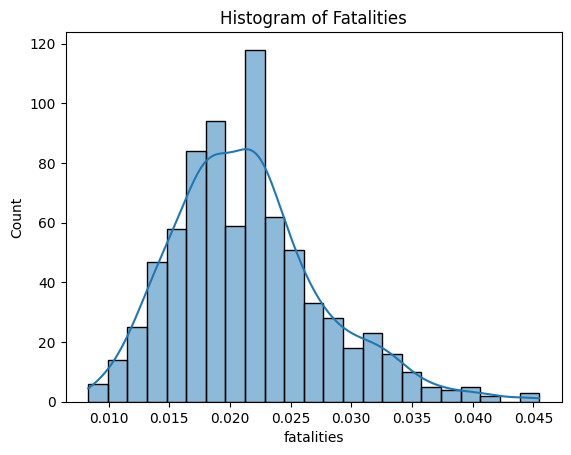

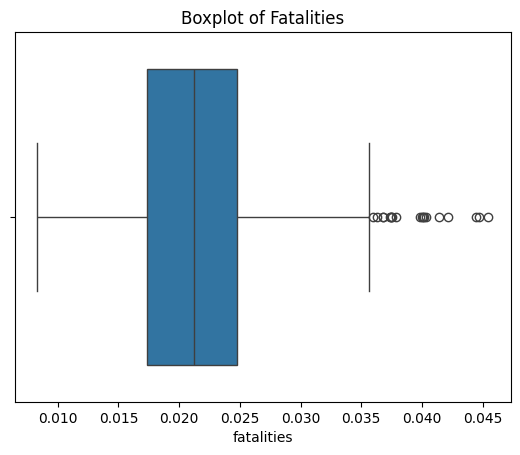

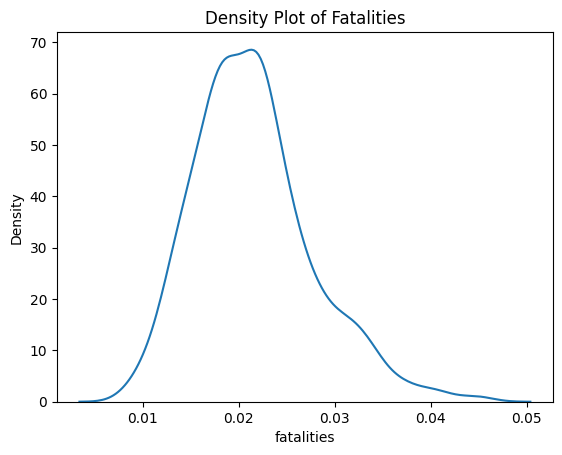

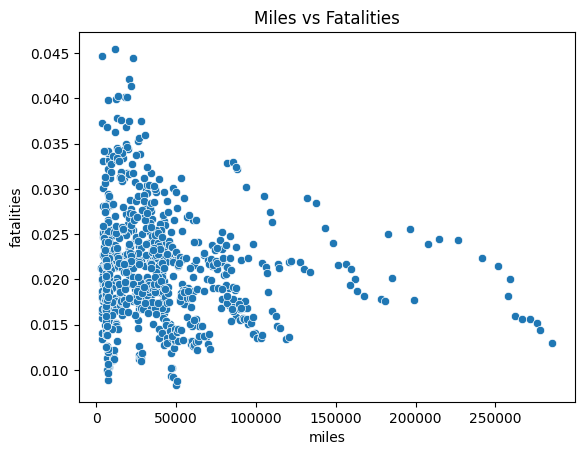

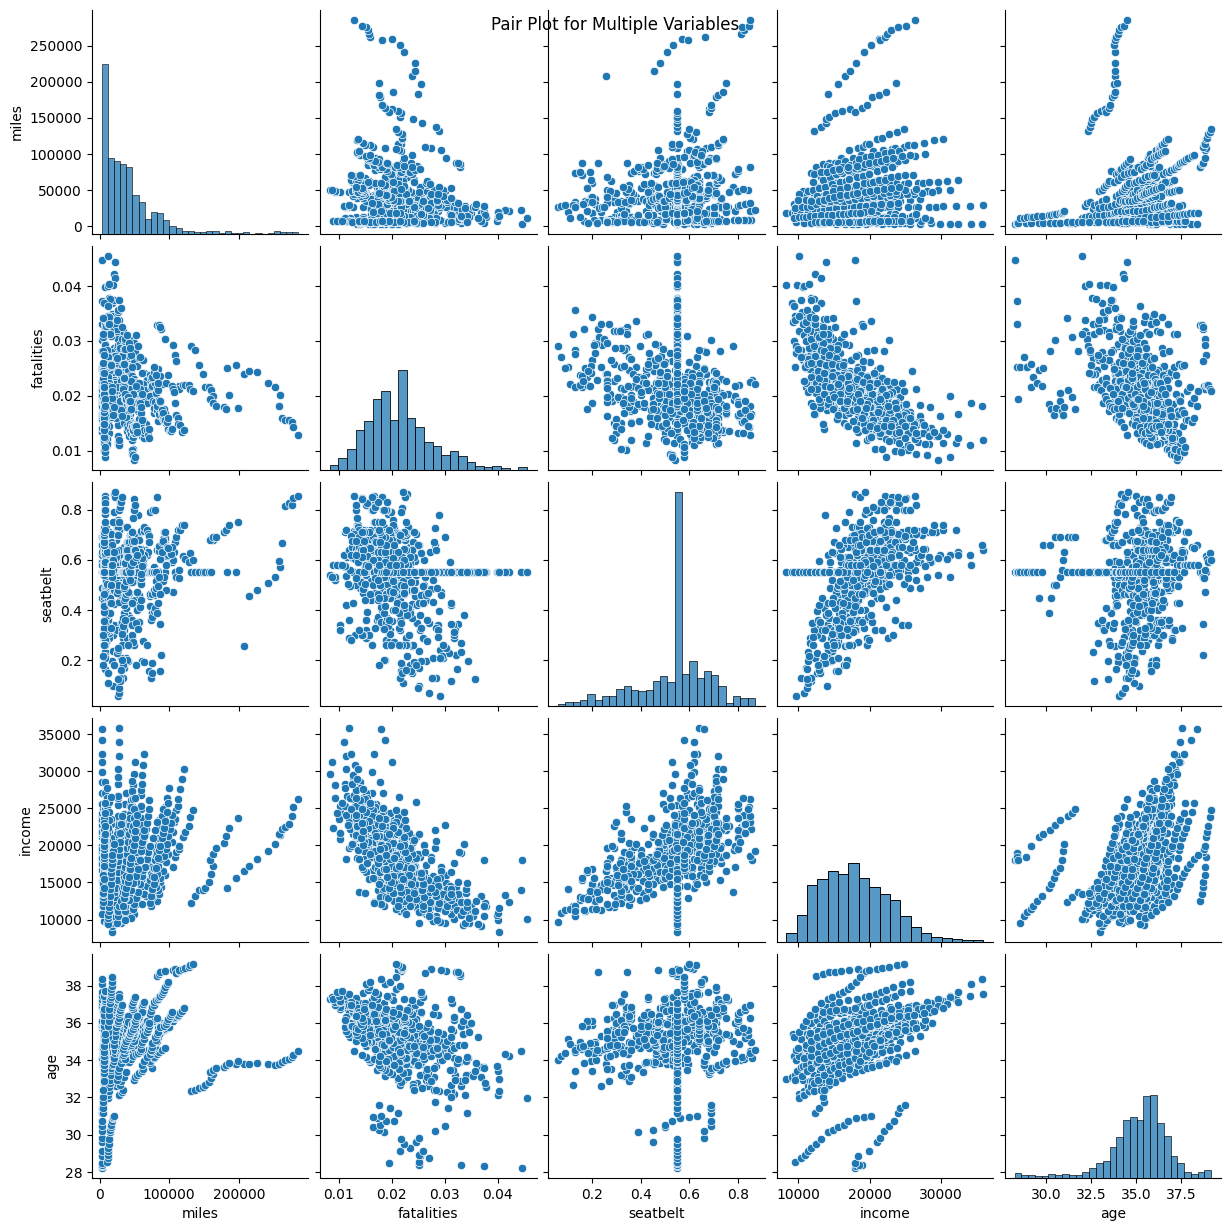

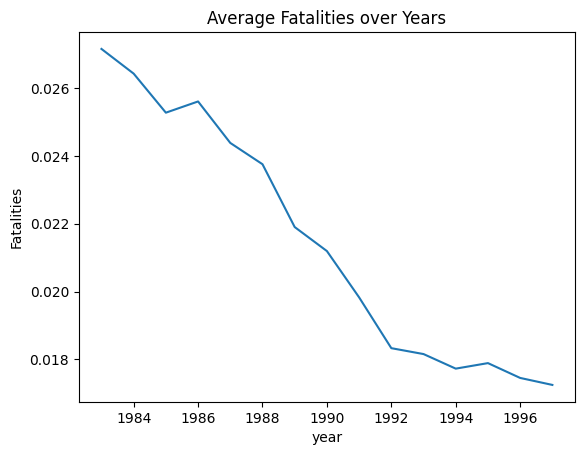

Mean Fatalities: 0.02148951477572025
Median Fatalities: 0.021198958158493
Grouped Data by Year and State:
 state        AK        AL        AR        AZ        CA        CO        CT  \
year                                                                          
1983   0.044669  0.029969  0.033385  0.034419  0.025037  0.026795  0.021231   
1984   0.037336  0.028276  0.031587  0.042158  0.025542  0.024728  0.022253   
1985   0.033073  0.025135  0.031206  0.041381  0.023892  0.022145  0.020224   
1986   0.025200  0.031791  0.034349  0.044430  0.024442  0.022856  0.018917   
1987   0.019487  0.029685  0.034907  0.029594  0.024322  0.021915  0.016769   
1988   0.025254  0.025804  0.031739  0.027564  0.022320  0.017965  0.018571   
1989   0.021610  0.025242  0.031694  0.025247  0.021520  0.019110  0.015506   
1990   0.024629  0.026472  0.028747  0.024509  0.020052  0.020016  0.014637   
1991   0.025118  0.025999  0.027720  0.023362  0.018172  0.019572  0.011642   
1992   0.028118  0.02253

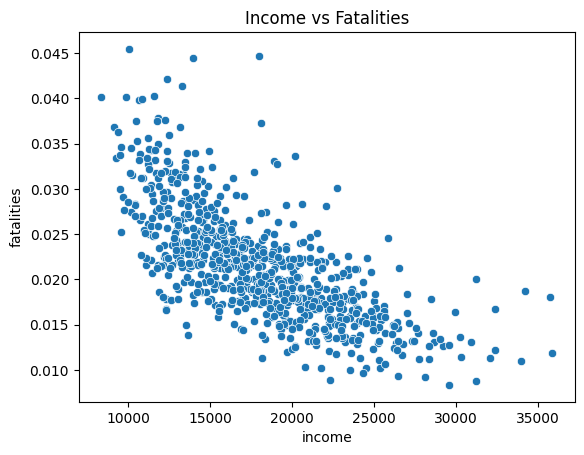

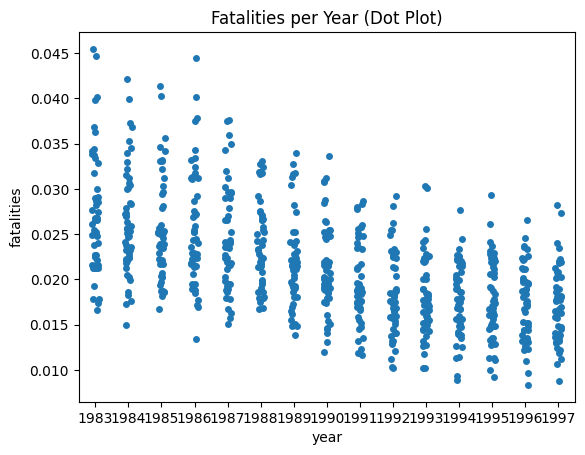

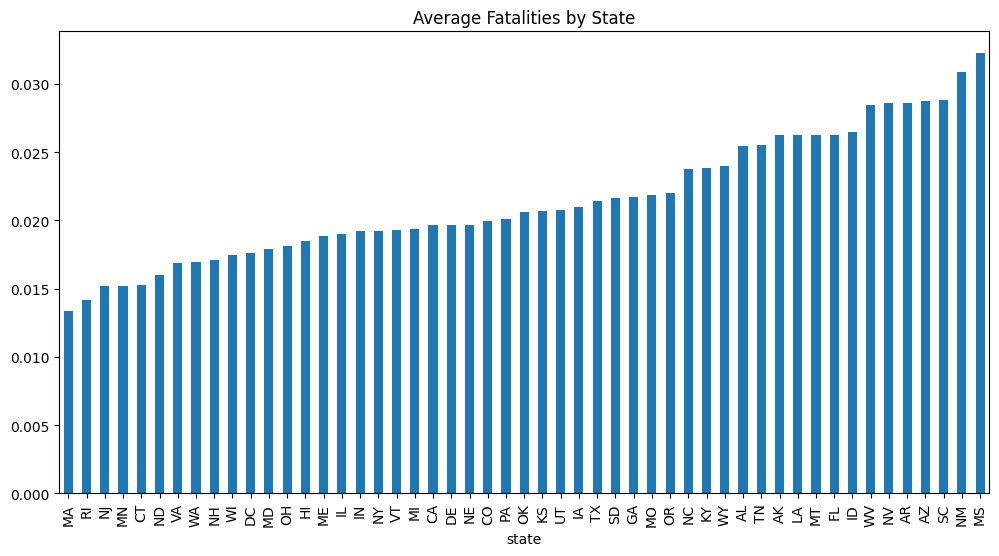

Clustered Data:
    fatalities  income  miles        age  cluster
0    0.044669   17973   3358  28.234966        1
1    0.037336   18093   3589  28.343542        1
2    0.033073   18925   3840  28.372816        1
3    0.025200   18466   4008  28.396652        1
4    0.019487   18021   3900  28.453251        1


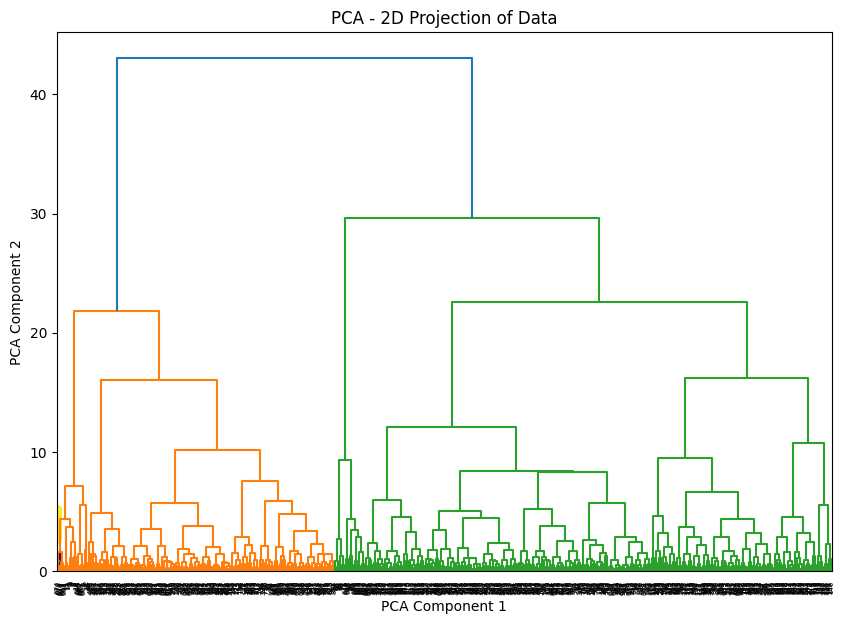

In [6]:
#github link : https://github.com/K-ashvi/EDA-21BCE0935/blob/main/eda.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

# Load the dataset
data = pd.read_csv('/content/USSeatBelts.csv')


# 1. Missing Data Handling
print("Missing Data Count:\n", data.isnull().sum())
data['seatbelt'].fillna(data['seatbelt'].median(), inplace=True)

# 2. Summary Statistics
print("Summary of Numerical Data:\n", data.describe())
print("Summary of Categorical Data:\n", data.describe(include=['object']))

# 3. Univariate Analysis
# Histogram, boxplot, and density plot for 'fatalities'
sns.histplot(data['fatalities'], kde=True)
plt.title('Histogram of Fatalities')
plt.show()

sns.boxplot(x=data['fatalities'])
plt.title('Boxplot of Fatalities')
plt.show()

sns.kdeplot(data['fatalities'])
plt.title('Density Plot of Fatalities')
plt.show()

# 4. Bivariate Analysis
# Scatter plot of 'miles' vs 'fatalities'
sns.scatterplot(x='miles', y='fatalities', data=data)
plt.title('Miles vs Fatalities')
plt.show()


# 5. Multivariate Analysis
# Pair plot for a subset of numerical features
sns.pairplot(data[['miles', 'fatalities', 'seatbelt', 'income', 'age']])
plt.suptitle('Pair Plot for Multiple Variables')
plt.show()

# 6. Time Series Analysis
# Line plot of fatalities over years
data.groupby('year')['fatalities'].mean().plot(kind='line', title='Average Fatalities over Years')
plt.ylabel('Fatalities')
plt.show()

# 7. 1-D, 2-D, and n-D Statistical Data Analysis
print('Mean Fatalities:', data['fatalities'].mean())
print('Median Fatalities:', data['fatalities'].median())

# 2-D: Group statistics by year and state
grouped_data = data.groupby(['year', 'state'])['fatalities'].mean().unstack()
print("Grouped Data by Year and State:\n", grouped_data)

# n-D: Group statistics by multiple dimensions, e.g., year, state, and alcohol law
print("Grouped Data by Year, State, and Alcohol Law:\n", data.groupby(['year', 'state', 'alcohol'])['fatalities'].mean())

# 8. Contingency Tables
contingency_table = pd.crosstab(data['speed65'], data['enforce'])
print("Contingency Table between Speed65 and Enforce:\n", contingency_table)

# 9. Visualizations (Scatter, Dot, Bar)
# Scatter plot of fatalities vs. income
sns.scatterplot(x='income', y='fatalities', data=data)
plt.title('Income vs Fatalities')
plt.show()

# Dot chart for fatalities
sns.stripplot(x='year', y='fatalities', data=data)
plt.title('Fatalities per Year (Dot Plot)')
plt.show()

# Bar plot for fatalities by state
data.groupby('state')['fatalities'].mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.title('Average Fatalities by State')
plt.show()

# 10. Hierarchical Agglomerative Clustering
# Scaling the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['fatalities', 'income', 'miles', 'age']])

# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['cluster'] = cluster.fit_predict(scaled_data)
print("Clustered Data:\n", data[['fatalities', 'income', 'miles', 'age', 'cluster']].head())

# 11. Principal Component Analysis (PCA)
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot PCA results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - 2D Projection of Data')
plt.show()
